In [7]:
# general 
import pandas as pd 
import numpy as np 

# plotting
import seaborn as sns 
import plotly.express as px
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# settings
plt.style.use('seaborn')
plt.rcParams["figure.figsize"] = (16, 8)
pd.options.plotting.backend = "plotly"

# ML
from sklearn.model_selection import TimeSeriesSplit
from sktime.forecasting.naive import NaiveForecaster

# import common files
from common import timeseries_evaluation_metrics_func

import warnings
warnings.filterwarnings("ignore")

In [8]:
# load all dataframes
full_day_min_cgm = pd.read_parquet("Parquet Files/full_day_min_cgm.parquet.gzip")

# Baseline

Mean RMSE for naive forecast: 0.9695923738036054.


0.9695923738036054

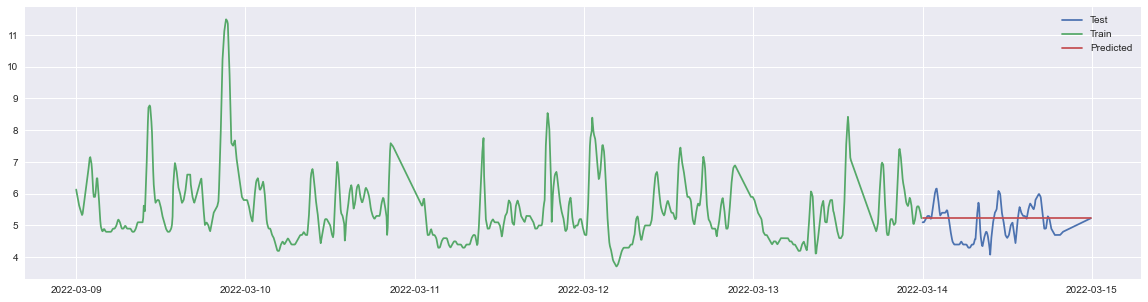

In [9]:
def naive_walk(data):
    count = 0
    errors = []
    data = data.reset_index()
    timeSeriesCrossVal = TimeSeriesSplit(n_splits=5) # no. splits = no. of days - 1
    
    # iterate through dataframe
    for train_lst, test_lst in timeSeriesCrossVal.split(data):
        
        # get train and test sets
        y_train = data.iloc[train_lst[0]:train_lst[-1]]
        y_test = data.iloc[test_lst[0]:test_lst[-1]]
        
        # fit
        forecaster = NaiveForecaster(strategy="last")
        forecaster.fit(y_train)
        
        # predict
        y_pred = forecaster.predict(test_lst[:-1])
        
        # compute errors
        err = timeseries_evaluation_metrics_func(y_test['glucose'].values,
                                                 y_pred['glucose'].values)
        errors.append(err['rmse'])
        
        # if last split, get the values for plotting
        count = count+1
        if count == 5:
            fig, ax = plt.subplots(figsize=(20, 5))
            ax.plot(y_test.set_index("datetime"), label="Test")
            ax.plot(y_train.set_index("datetime"), label="Train")
            ax.plot(pd.Series(y_pred['glucose'].values, index=y_test['datetime']), label="Predicted")
            ax.legend(loc='best')
            fig.show()

    mean_rmse = np.mean(errors)
    
    print(f"Mean RMSE for naive forecast: {mean_rmse}.")
    return mean_rmse
        
naive_walk(full_day_min_cgm['glucose'])